In [8]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target

print("Размерность X:", X.shape)

Размерность X: (569, 30)


In [9]:
USE_ZSCORE = True  

In [10]:
len(X)

569

In [11]:
from source.PCA import PCA
pca = PCA(eps=0.05, use_zscore=USE_ZSCORE)   
Z = pca.fit_transform(X)

print("Эффективная размерность m:", pca.n_components_)
print("Сохранённая доля дисперсии:",
      pca.explained_variance_ratio_[:pca.n_components_].sum())

Эффективная размерность m: 9
Сохранённая доля дисперсии: 0.9398790324425351


In [12]:
from sklearn.decomposition import PCA as SkPCA
 
if USE_ZSCORE:
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    sk_pca = SkPCA(n_components=pca.n_components_)
    Z_ref = sk_pca.fit_transform(X_scaled)
else:
    sk_pca = SkPCA(n_components=pca.n_components_)
    Z_ref = sk_pca.fit_transform(X)

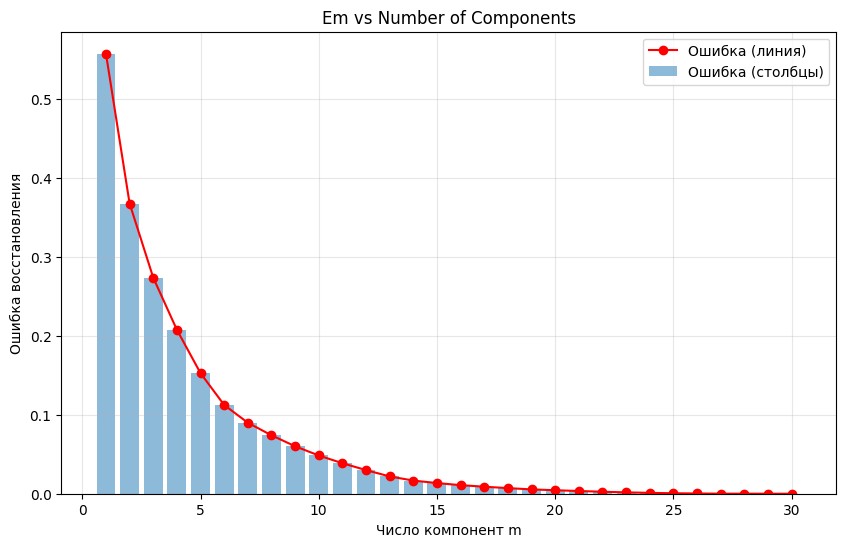

In [13]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1, len(pca.residual) + 1)
plt.figure(figsize=(10, 6))
plt.bar(x, pca.residual, alpha=0.5, label='Ошибка (столбцы)')
plt.plot(x, pca.residual, 'ro-', markersize=6, label='Ошибка (линия)')
plt.xlabel('Число компонент m')
plt.ylabel('Ошибка восстановления')
plt.title('Em vs Number of Components')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Проверка совпадения проекций с sklearn

In [14]:
# Проекция равна -> косинус =+-1, разные проекции имеют косинус 0
print(
    np.allclose(
        np.abs(pca.components_ @ sk_pca.components_.T),
        np.eye(pca.n_components_),
        atol=1e-6
    )
)

True
